# Análise de sorteios da mega-sena

Esta é uma análise dos resultados dos sorteios da mega-sena até a data 19-11-2022.
Os dados foram coletados no formato .xls do site: https://asloterias.com.br/todos-resultados-mega-sena

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Coleta de dados

In [198]:
df = pd.read_excel('sorteios_megasena_ate_19-10-22.xlsx')

In [199]:
# Exibe os 5 primeiros registros do dataframe
df.head()

,Concurso,Data,bola 1,bola 2,bola 3,bola 4,bola 5,bola 6
0,2540,19/11/2022,28,8,49,34,41,2
1,2539,16/11/2022,59,36,23,1,33,32
2,2538,12/11/2022,33,15,6,52,20,19
3,2537,09/11/2022,24,26,48,37,12,31
4,2536,05/11/2022,45,9,27,30,33,22


In [200]:
# Mostra detalhes do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540 entries, 0 to 2539
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Concurso  2540 non-null   int64 
 1   Data      2540 non-null   object
 2   bola 1    2540 non-null   int64 
 3   bola 2    2540 non-null   int64 
 4   bola 3    2540 non-null   int64 
 5   bola 4    2540 non-null   int64 
 6   bola 5    2540 non-null   int64 
 7   bola 6    2540 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 158.9+ KB


### Transformação dos dados

In [201]:
# Seleciona apenas tipos de dados inteiros
numeros_sorteados = df.select_dtypes(include='int')

# Remove a coluna Concurso
numeros_sorteados.drop('Concurso', axis=1, inplace=True)

In [202]:
# Exibe os dados somente das bolas sorteadas
print(type(numeros_sorteados))
numeros_sorteados

<class 'pandas.core.frame.DataFrame'>


,bola 1,bola 2,bola 3,bola 4,bola 5,bola 6
0,28,8,49,34,41,2
1,59,36,23,1,33,32
2,33,15,6,52,20,19
3,24,26,48,37,12,31
4,45,9,27,30,33,22
...,...,...,...,...,...,...
2535,1,19,46,6,16,2
2536,6,59,42,27,1,5
2537,36,30,10,11,29,47
2538,9,39,37,49,43,41


In [ ]:
# Análise dos números sorteados de uma bola
# Conta a quantidade de valores recorrentes da coluna bola 1 e retorna uma série do pandas
print(type(numeros_sorteados['bola 1'].value_counts()))
numeros_sorteados['bola 1'].value_counts()

In [203]:
# Totaliza o número de vezes que um número foi sorteado por bola. Faz o agrupamento com groupby
# Retorna uma série do pandas
frequencia_numeros_bola1 = numeros_sorteados.groupby(['bola 1']).size()
frequencia_numeros_bola2 = numeros_sorteados.groupby(['bola 2']).size()
frequencia_numeros_bola3 = numeros_sorteados.groupby(['bola 3']).size()
frequencia_numeros_bola4 = numeros_sorteados.groupby(['bola 4']).size()
frequencia_numeros_bola5 = numeros_sorteados.groupby(['bola 5']).size()
frequencia_numeros_bola6 = numeros_sorteados.groupby(['bola 6']).size()

print(type(frequencia_numeros_bola1))

<class 'pandas.core.series.Series'>


In [204]:
# Converte as séries para array numpy
lista_bola1 = np.array(frequencia_numeros_bola1)
lista_bola2 = np.array(frequencia_numeros_bola2)
lista_bola3 = np.array(frequencia_numeros_bola3)
lista_bola4 = np.array(frequencia_numeros_bola4)
lista_bola5 = np.array(frequencia_numeros_bola5)
lista_bola6 = np.array(frequencia_numeros_bola6)

In [205]:
# Exibe o tipo e a quantidade de elementos de um array de dados da bola 1
print(type(lista_bola1))
print(f'Total de elementos: {len(lista_bola1)}')

<class 'numpy.ndarray'>
Total de elementos: 60


In [206]:
# Faz a somatória da frequência de vezes que os números de 1 a 60 foram sorteados (somatória de arrays).
# Ex: O primeiro elemento do array corresponde a quantidade de vezes que o número 1 foi sorteado.
# Ex: O último elemento do array corresponde a quantidade de vezes que o número 60 foi sorteado.
frequenciaGeral_numeroSorteado = lista_bola1 + lista_bola2 + lista_bola3 + lista_bola4 + lista_bola5 + lista_bola6 
print(frequenciaGeral_numeroSorteado)

[247 258 237 272 280 253 238 260 237 289 262 245 257 239 223 264 267 248
 242 246 218 227 272 260 240 210 265 267 263 269 238 263 275 267 265 261
 277 266 242 243 272 276 263 268 247 253 242 234 263 246 263 255 292 266
 216 263 240 246 242 241]


### Resultado: Números mais sorteados

Apresentação dos números mais sorteados em ordem decrescente (mais sorteado para o menos sorteado).

In [210]:
# Cria uma série a partir do array
x_values = [num for num in range(1, 60 + 1)]
serie_numeros_sorteados = pd.Series(frequenciaGeral_numeroSorteado, index=x_values)

# Cria um dataframe a partir do série
df_resultado = pd.DataFrame(serie_numeros_sorteados, columns=['Frequência Sorteios'])
df_resultado.sort_values(['Frequência Sorteios'], ascending=False) 

,Frequência Sorteios
53,292
10,289
5,280
37,277
42,276
33,275
4,272
23,272
41,272
30,269


### Resultado: gráfico

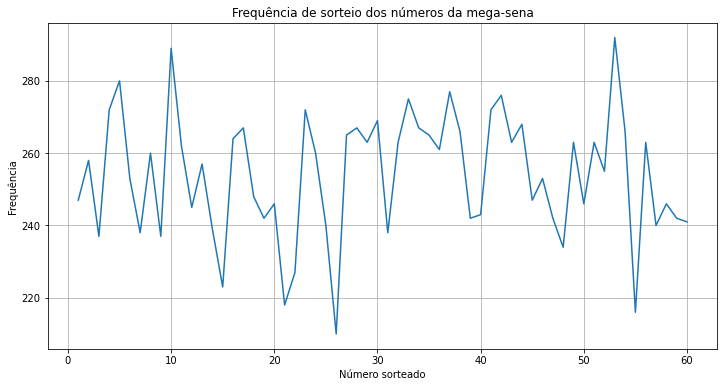

In [208]:
# Plota o gráfico que mostra a frequência de sorteio dos números de 1 a 60
plt.figure(figsize=(12,6))
plt.title('Frequência de sorteio dos números da mega-sena')
plt.xlabel('Número sorteado')
plt.ylabel('Frequência')

plt.grid()
plt.plot(serie_numeros_sorteados)
plt.show()